In [19]:
import numpy as np
import scipy.linalg as LA 
import copy
#%matplotlib widget
import matplotlib.pyplot as plt


# Hands-on 1:
# Basics of Quantum Mechanics, gymnastics with spins and operators 

Let us review some basic quantum many-body physics, ie. consider systems made by many copies of individual consituentes.  

Start with spins $s=\frac{1}{2}$ (qubits)

## Single spin
In this specific case the states of a single constituent span a two dimensional complex Hilbert space.

We can thus use a vector with two complex components

$|\phi\rangle = c_0 |0\rangle + c_1 |1\rangle$


### E1 Random state
Write a python code that uses the numpy random generator in order to create a random state of a spin one half. Store it as a column vector.

In [20]:
#E1
# 
c_0 =np.random.rand()+1j*np.random.rand()
c_1 =np.random.rand()+1j*np.random.rand()

phi = np.array([[c_0],[c_1]])
print(phi)
print(np.shape(phi))

#Alternatively 
phi = np.random.rand(2,1) + 1j * np.random.rand(2,1)
print(phi)

[[0.64348686+0.34690584j]
 [0.10593697+0.72948479j]]
(2, 1)
[[0.03772857+0.15866079j]
 [0.54955489+0.40732845j]]


### E2 Normalize your state
In QM states are usually normalized, normalize the state you have created previously:
$\langle \phi|\phi\rangle =1$

(*Hint: use the numpy/scipy linalg norm function*) https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

In [21]:
#E2 

print(LA.norm(phi))
#or: np.linalg.norm(phi)
phi = phi/LA.norm(phi)
print(LA.norm(phi))

0.7032238121855963
0.9999999999999999


## Defining operators 
Once we have a state we can compute expectation values of operators. In QM, typically operators are Hermitian. 

All Hermitian operators can be written as linear combinations of the basis of Hermitian operators. 

For a single spin 1/2 there are 4 operators in the basis: 

$ 1\equiv \sigma_0, \sigma_x \equiv \sigma_1, \sigma_y \equiv \sigma_2, \sigma_z \equiv \sigma_3$.

They satisfy the algebra
$\sigma_i \sigma_j = \delta_{ij}+i \epsilon_{ijk}\sigma_k$

with $\epsilon_{ijk}$ the completely antisymmetric tensor with $\epsilon_{012}=1$

(In this notation summation over repeated indices is implied, called Einstein notation)



In [22]:
identity = np.eye(2)
sigma_x = np.array([[0.,1.],[1.,0.]])
sigma_y = np.array([[0.,-1.j],[1.j,0.]])
sigma_z = np.array([[1.,0.],[0.,-1.]])

print(identity)
print(sigma_x)
print(sigma_y)
print(sigma_z)


[[1. 0.]
 [0. 1.]]
[[0. 1.]
 [1. 0.]]
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
[[ 1.  0.]
 [ 0. -1.]]


In [23]:
print(np.isclose(sigma_x @ sigma_y, 1j*sigma_z))
print(np.allclose(sigma_x @ sigma_y, 1j*sigma_z))
print(np.allclose(sigma_x @ sigma_z, -1j*sigma_y))

[[ True  True]
 [ True  True]]
True
True


 ### E3 Construct operators from elements of the basis
 Write an arbitrary operator linear combination of the four above four operators using four random real coefficients


$O = c_i \sigma_i$ (i=0,1,2,3), 

normalize it in such a way that 
$c_i c_i=1$
 

In [24]:
#E3 

c = np.random.rand(4,1)
c = c/LA.norm(c)
print(LA.norm(c))
print(c)


operator =c[0]*identity + c[1]*sigma_x+c[2]*sigma_y+c[3]*sigma_z
print(operator)

1.0
[[0.10341814]
 [0.55105011]
 [0.05678373]
 [0.82608963]]
[[ 0.92950777+0.j          0.55105011-0.05678373j]
 [ 0.55105011+0.05678373j -0.72267148+0.j        ]]


In [25]:
# For complex coefficients this doesn't work (spoils hermiticity)

test_c = np.random.rand(4,1) + 1j* np.random.rand(4,1)
test_operator =test_c[0]*identity + test_c[1]*sigma_x+test_c[2]*sigma_y+test_c[3]*sigma_z

np.allclose(test_operator, test_operator.conj().T)

False

### E4 Find the components in a given basis
Now from the knowledge of the operator $O$, reconstruct its components in the basis of the above operators. 

(*Hint: use the fact that Pauli operators are traceless, and they square to the identity*)

In [26]:
d =np.zeros([4,1]) #+1j*np.zeros([4,1])
d[0] = np.trace(operator)/2
d[1] = np.trace(operator@sigma_x)/2
d[2] = np.trace(operator@sigma_y)/2
d[3] = np.trace(operator@sigma_z)/2

print(np.allclose(c,d))

True


/tmp/ipykernel_28639/225489993.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  d[0] = np.trace(operator)/2
/tmp/ipykernel_28639/225489993.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  d[1] = np.trace(operator@sigma_x)/2
/tmp/ipykernel_28639/225489993.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  d[2] = np.trace(operator@sigma_y)/2
/tmp/ipykernel_28639/225489993.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  d[3] = np.trace(operator@sigma_z)/2


### E5 Check Hermiticity of the operator
Since we are interested in observable we want the operator to be Hermitian, check whether this is the case

In [27]:

def ishermitian(op):
    return np.allclose(op, op.conj().T)

ishermitian(operator)

True

### E6 Computing expectation values

Given the state $|\phi \rangle$ and the operator $O$ defined above,
 compute the expectation value $\langle \phi |O|\phi \rangle$, assuming a normalized state

In [28]:
exp_O = phi.T.conj() @ operator @ phi

print(exp_O)

print(np.real_if_close(exp_O))

[[-0.46007158+0.j]]
[[-0.46007158]]


### E7 Changing basis to states and operators
We can clearly change the basis to operators and states, for example we can re-express the above state and operator in the basis where $\sigma_x$ is diagonal, and the matrix element of the new operator in the new state should be the same than the old one in the old state.

In [29]:
#We know that it should be U_x =np.array([[1,1],[1,-1]])/np.sqrt(2)

#Let's find it: compute eigenvalues and eigenvectors of sigma_x, which will provide the basis change

vals,vecs = np.linalg.eig(sigma_x)
print(vals)
print(vecs)

U_x = vecs

print(np.shape(U_x))
print(U_x.T@sigma_x@U_x)
phi_x =U_x.T@phi
operator_x = U_x.T@operator@U_x

print(phi.T.conj()@operator@phi)
print(phi_x.T.conj()@operator_x@phi_x)

[ 1. -1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
(2, 2)
[[ 1.  0.]
 [ 0. -1.]]
[[-0.46007158+0.j]]
[[-0.46007158+0.j]]





## Two and more spins

Now move on to consider a two-qubit system, and build a random state of two spins built from random states of single spins



### E8 Build a two-spin WF

with $| \phi_1\rangle$ is the qubit state defined above, and $| \phi_2\rangle$ a new random state,

build 
$|\phi_1 \phi_2\rangle =| \phi_1\rangle \otimes  |\phi_2\rangle$

*Hint: use the np.kron() function

In [30]:
phi_1 = copy.deepcopy(phi)

phi_2 = np.random.rand(2,1) + 1j* np.random.rand(2,1) 
phi_2= phi_2/LA.norm(phi_2)

phi_phi=np.kron(phi_1,phi_2)

print(phi_phi)
print(np.shape(phi_phi))
LA.norm(phi_phi)

[[-0.09663556+0.17962759j]
 [ 0.00544844+0.11021909j]
 [ 0.17494003+0.83747353j]
 [ 0.31513538+0.33902997j]]
(4, 1)


1.0

### Expectation values on more spins

Now we can compute the expectation value of different operators, for example we can compute the old operator on the first spin,
taking into account our two-body system we should thus consider  $O \otimes 1$

and we should get the same number out as before 

In [31]:
operator_tensor_identity = np.kron(operator,np.eye(2))
print(phi_phi.T.conj()@operator_tensor_identity@phi_phi)
print(phi.T.conj()@operator@phi)

[[-0.46007158+0.j]]
[[-0.46007158+0.j]]


But now we can also compute the same operator on the other spin, $1 \otimes O$

In [32]:
identity_tensor_operator = np.kron(np.eye(2),operator)
phi_phi.T.conj()@identity_tensor_operator@phi_phi

array([[0.92576391+5.55111512e-17j]])

Or multi-spin operators $O \otimes O$ and their combinations

In [33]:
operator_tensor_operator = np.kron(operator,operator)
phi_phi.T.conj()@operator_tensor_operator@phi_phi

array([[-0.42591766+2.77555756e-17j]])

### Ising Hamiltonian 

Now we can study our first many body system, the Ising model in transverse field.

 For $N=3$ spins, the Hamiltonian reads
 
$ H = -\sigma_x^1\otimes \sigma_x^2 - \sigma_x^2\otimes \sigma_x^3 -\sigma_x^3\otimes \sigma_x^1+\lambda \left(  \sigma_z^1+  \sigma_z^2+\sigma_z^3\right)$.

Build it for several values of $\lambda$ (e.g. 20 points in the interval $[0,10]$) and plot the ground state energy for every value. 

In [34]:
N=3

gs_energy =[]
for v_lambda in np.linspace(0,10,20):
    H = -np.kron(sigma_x,sigma_x) + v_lambda*(np.kron(identity,sigma_z)+  np.kron(sigma_z,identity))

    H = np.kron(H,np.eye(2)) + np.kron(np.eye(2**(N-2)),-np.kron(sigma_x,sigma_x)) + (
        v_lambda*(np.kron(np.eye(2**(N-1)),sigma_z)))
                                                                                                                                                  
    H = H -np.kron(sigma_x, np.kron(np.eye(2**(N-2)),sigma_x))

    
    eig_H,_ =LA.eigh(H)
    gs_energy.append(eig_H[0])  

plt.figure()
plt.plot(np.linspace(0,10,20),gs_energy,'.-')
plt.xlabel('lambda',fontsize =16)
plt.ylabel('$E_0$', fontsize=16)

ModuleNotFoundError: No module named 'ipympl'

### The cost of increasing the number of spins. 
We can now try to understand what is the cost of increasing the number of spins. From the computational point of view there are two kinds of cost. One is the cost of storing the state of the system in memory, typically called the *space* cost, the other is the cost entailed with performing the computation, typically called the *time* cost. 

Let us try and plot the *space* cost as a function of the number of constituents. 


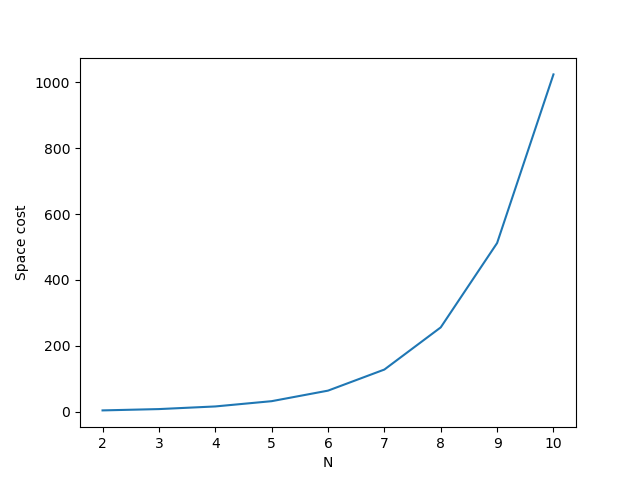

In [31]:
space_cost=[]
space_cost.append(np.size(phi_phi))
phi_n_phi =np.kron(phi_phi,phi)
space_cost.append(np.size(phi_n_phi))
i_N =[4, 5, 6, 7, 8, 9, 10]
for N in i_N:
    phi_n_phi =np.kron(phi_n_phi,phi)
    space_cost.append(np.size(phi_n_phi))

plt.figure()
plt.plot([2,3]+i_N,space_cost)
plt.xlabel('N')
plt.ylabel('Space cost')
plt.show()

We can also now compute the time it takes to compute the expectation value of a given observable


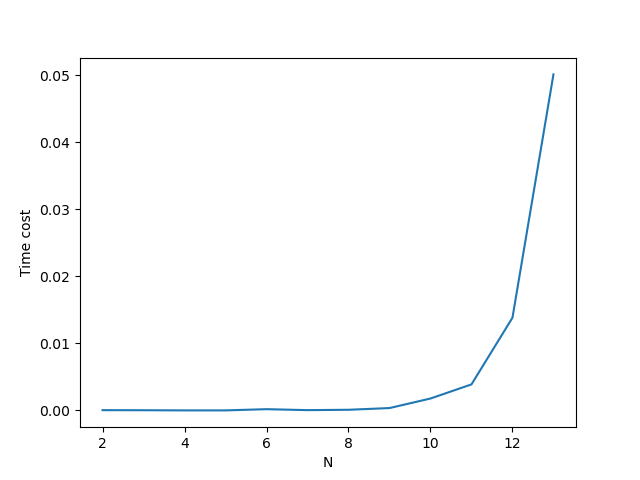

In [32]:
import time
times_to_execute=[]

operator_tensor_identity = np.kron(operator,np.eye(2))
t1=time.time()
phi_phi.T.conj()@operator_tensor_identity@phi_phi
t2=time.time()
times_to_execute.append(t2-t1)
operator_tensor_many_identities = np.kron(operator_tensor_identity,np.eye(2))
phi_n_phi =np.kron(phi_phi,phi)
t1=time.time()
phi_n_phi.T.conj()@operator_tensor_many_identities@phi_n_phi
t2=time.time()
times_to_execute.append(t2-t1)
i_N =[4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for N in i_N:
    phi_n_phi =np.kron(phi_n_phi,phi)
    operator_tensor_many_identities = np.kron(operator_tensor_many_identities,np.eye(2))
    t1=time.time()
    phi_n_phi.T.conj()@operator_tensor_many_identities@phi_n_phi
    t2=time.time()
    times_to_execute.append(t2-t1)

plt.figure()
plt.plot([2,3]+i_N,times_to_execute)
plt.xlabel('N')
plt.ylabel('Time cost')
plt.show()


"curse of dimensionality"

## Product states 

We have not used at all the fact that the states we are dealing with here are very special, namely they are product states.

 In order to see this we can compute the connected correlation functions, that is 

$\langle O_i O_j \rangle -\langle O_i\rangle \langle O_j\rangle$


### E9: Compute the connected correlator $\langle O_1 O_3 \rangle -\langle O_1\rangle \langle O_3\rangle$ for a four-spin system 

In [33]:
def rwf(n):
    phi = np.random.rand(n,1) + 1j*np.random.rand(n,1)
    phi = phi/LA.norm(phi)
    return phi

p1 = rwf(2)
p2 = rwf(2)
p3 = rwf(2)
p4 = rwf(2)

pn2 = np.kron(p1, p2)
pn3 = np.kron(pn2, p3)
pn4 = np.kron(pn3, p4)

print(pn4, np.shape(pn4), 2**4)

op_O1 = np.kron(operator, np.eye(2))
op_O1O = np.kron(op_O1, operator)
op_O1O1 = np.kron(op_O1O, np.eye(2))

evO1O1 = pn4.T.conj() @ op_O1O1 @ pn4

evO_1 = p1.T.conj() @ operator @ p1 
evO_3 = p3.T.conj() @ operator @ p3 

print(evO_1)
print(evO_3)

print(evO1O1)
print(evO_1 * evO_3)

np.isclose(evO1O1, evO_1 * evO_3)

[[-0.18126209-0.01857535j]
 [-0.36864417-0.23624593j]
 [-0.06157866+0.0030513j ]
 [-0.13538029-0.06017875j]
 [-0.20722638-0.07909628j]
 [-0.35875535-0.39418481j]
 [-0.07335657-0.01586492j]
 [-0.14014502-0.1135122j ]
 [-0.14199099-0.00249043j]
 [-0.30184415-0.15919497j]
 [-0.04762099+0.00642427j]
 [-0.10909861-0.03782065j]
 [-0.16613981-0.04778128j]
 [-0.30456396-0.28250123j]
 [-0.05801324-0.00749053j]
 [-0.11631063-0.0789256j ]] (16, 1) 16
[[1.11262001-1.12379688e-16j]]
[[1.18794546-4.34742653e-17j]]
[[1.32173189+6.9388939e-18j]]
[[1.32173189-1.81871278e-16j]]


array([[ True]])

so this always vanishes, as a consequence of the structure of the state. Feel free to check for other positions of the operators and bigger states

As a result
$⟨𝑂_i𝑂_j⟩=⟨𝑂_i⟩⟨𝑂_j⟩$ for product states, leading to a huge simplification. Indeed we can now compute any arbitrary correlation function or operator by just multiplying the values of local operators.

So, rather than explicitly building our large tensor product state, we can just keep a list of individual product states, and use it to compute expectation values.



## The generic multi-spin state

As you can probably expect, the previous property is not general to all multi-spin states. 
How can we build a more general state ? 

 We can evolve any initial state under the action of a random Hamiltonian for unit time. The only request is that the Hamiltonian is Hermitian, so rather than following the ideas of the previous section we just build a random $2^N \times 2^N$ Hamiltonian, that is extensive and build the corresponding state.

In [34]:
def build_nprod_wf(n):
    phi_n = np.random.rand(2,1) + 1j* np.random.rand(2,1) 
    for ii in range(1,n):
        phi_j = np.random.rand(2,1) + 1j* np.random.rand(2,1) 
        phi_n = np.kron(phi_n, phi_j)

    return phi_n/LA.norm(phi_n)

phi_8 = build_nprod_wf(8)
np.shape(phi_8)

(256, 1)

In [35]:
N = 8
dim_h = 2**N
random_h = np.array(np.random.rand(dim_h,dim_h)+1j*np.random.rand(dim_h,dim_h))
random_h = random_h+random_h.T.conj()
random_h = random_h/LA.norm(random_h)

random_unitary =LA.expm(-1j*random_h)

init_state = build_nprod_wf(8)
random_state=random_unitary@init_state

print(LA.norm(init_state))
print(LA.norm(random_state))

0.9999999999999998
0.9999999999999996


Is there any way to distinguish between product states and more general many-body states such as this one?


# Computing entanglement


Let us now see how to compute entanglement between various bipartitions.
Along the way we will also learn how to group and split indices. 



### Two qubits 
We first start with a state of two qubits. 
$|\psi \rangle = \sum_{ij}c_{ij} |ij\rangle$. 

Start constructing it as a four dimensional normalized vector, ie. a genuinely random two-qubit state

Then you can reshape it to a tensor with two indices


In [36]:
psi =np.random.rand(4,1)+1j*np.random.rand(4,1)
psi = psi/LA.norm(psi)

psi=np.reshape(psi,[2,2])
print(psi)

[[0.52947816+0.15303689j 0.23106769+0.16279731j]
 [0.21635411+0.58858838j 0.39403465+0.26043936j]]



Now you can construct the reduced density matrix of the first spin and of the second:

$\rho_1 = \textrm{tr}_2 (|\psi\rangle\langle \psi|)$

$\rho_2 = \textrm{tr}_1 (|\psi\rangle\langle \psi|)$



In [37]:
rho_1 = psi@psi.T.conjugate()
print(rho_1)
rho_2 = psi.T@psi.conjugate()
print(rho_2)

[[0.38366265+2.03987937e-18j 0.33807802-2.74565875e-01j]
 [0.33807802+2.74565875e-01j 0.61633735+9.83032485e-18j]]
[[0.69701279+9.98476538e-18j 0.38580189+1.24741354e-01j]
 [0.38580189-1.24741354e-01j 0.30298721-4.04746296e-18j]]


Notice that the two reduced density matrices are different but both have trace 1 and are Hermitian


In [38]:
print(np.trace(rho_1))
print(np.trace(rho_2))

print(ishermitian(rho_1))
print(ishermitian(rho_2))


(1+1.187020421738914e-17j)
(0.9999999999999999+5.93730242089561e-18j)
True
True



Also their eigenvalues? 

In [39]:
eig_rho_1, U_rho_1 = LA.eigh(rho_1)
print(eig_rho_1)
eig_rho_2, U_rho_2 = LA.eigh(rho_2)
print(eig_rho_2)

[0.04920343 0.95079657]
[0.04920343 0.95079657]


They are the same! So the two matrices are different but have the same spectrum. Since the spectrum is positive, we can interpret it as a probability distribution and compute its entropies. The Von Neumann entropy is called *entanglement entropy*

$S = -tr (\rho \, log \rho)$

There are also Tsallis entropies defined as 

$E_{n} = \textrm{tr} \rho ^n$ 

and Renyi entropies

$S_{n} = \frac{log{E_n}}{1-n}$

Let's compute the VN entanglement entropy here. You have to pay attention to the fact that if you have a zero eigenvalue, it contributes zero to the EE.

In [40]:
def compute_vn(eig_rho):
    cut_off =1.e-12
    mask_sl=np.greater_equal(np.abs(eig_rho),cut_off)
    eig_rho = eig_rho[mask_sl]
    vn_ent =sum(-eig_rho*np.log(eig_rho))
   
    return vn_ent


In [41]:
vn_ent_1 =compute_vn(eig_rho_1)
print(vn_ent_1)


0.19616309312054137


### SVD and entanglement
Rather than diagonalizing the reduced density matrix of the bipartition we can compute the singular value decomposition of the state (mathematically this is exactly the definition of the singular value decomposition, $svd(M) =\sqrt{( eig (MM^{\dagger}))}$

In [47]:
_,spect_rho,_= LA.svd(psi)

print(spect_rho**2)
print(eig_rho_1)


[0.95079657 0.04920343]
[0.04920343 0.95079657]


So we we will use this fact since this allows to avoid constructing explicilty the reduced density matrices. 

### E10: Compute the EE for a product two-qubit state

Now try to compute the spectrum of the RDM and the EE for a two-qubit *product* state such as those we have seen above

In [50]:
phi2 = build_nprod_wf(2)

phi2=np.reshape(phi2,[2,2])

rho_x = phi2@phi2.T.conjugate()

print(ishermitian(rho_x))

eig_rho_x, U_rho_x =LA.eigh(rho_x)
print(f"{eig_rho_x=}")

print(f"{compute_vn(eig_rho_x)=}")

True
eig_rho_x=array([2.34380886e-17, 1.00000000e+00])
compute_vn(eig_rho_x)=np.float64(0.0)


We see that the probability distribution have zero entropy, meaning it is completely ordered. Indeed the state was a product state and the reduced density matrices are just the projector on the original state

$\rho_1 = |\psi_1\rangle \langle \psi_1|$

$\rho_2 = |\psi_2\rangle \langle \psi_2|$


### E11: Do the same with the Bell state $ |\psi_b\rangle = |00\rangle + |11\rangle $

In [53]:
# Bell pair 

up = np.array([[1],[0]])
do = np.array([[0],[1]])

upup = np.kron(up,up)
dodo = np.kron(do,do)

bell1 = (upup+dodo)/np.sqrt(2)

print(LA.norm(bell1))

bell1m = np.reshape(bell1,(2,2))

rho1_bell =  bell1m@bell1m.T.conjugate()

print(f"{rho1_bell=}")


spectrum_bell, _ = LA.eigh(rho1_bell)

print(f"{spectrum_bell=}")

ub, sb, vb = LA.svd(bell1m) 

spectrum_bell_svd = sb**2

print(f"{spectrum_bell_svd=}")

print(f"{compute_vn(spectrum_bell)=}")
print(f"{compute_vn(spectrum_bell_svd)=}")
print(f"{np.log(2)=}")

0.9999999999999999
rho1_bell=array([[0.5, 0. ],
       [0. , 0.5]])
spectrum_bell=array([0.5, 0.5])
spectrum_bell_svd=array([0.5, 0.5])
compute_vn(spectrum_bell)=np.float64(0.6931471805599454)
compute_vn(spectrum_bell_svd)=np.float64(0.6931471805599454)
np.log(2)=np.float64(0.6931471805599453)


Now we show how to compute the spectrum of the three two bodies reduced density matrices contained in a three spin state. 

In [45]:

psi_8 =np.array(np.random.rand(8) +1j*np.random.rand(8))
psi_8=np.reshape(psi_8,[8,1])
psi_8=psi_8/LA.norm(psi_8)

psi_8_t =np.reshape(psi_8,[2,2,2])
psi_12_3 = np.reshape(psi_8_t,[4,2])
psi_1_23 = np.reshape(psi_8_t,[2,4])
psi_13_2 =np.reshape(np.transpose(psi_8_t,[0,2,1]),[4,2])


_,svd_12,_ =LA.svd(psi_12_3)
_,svd_23,_ =LA.svd(psi_1_23)
_,svd_13,_ =LA.svd(psi_13_2)


vn_ent_12 =compute_vn(svd_12**2)

print('Entanglement for 12')
print(vn_ent_12)


print('Entanglement for 23')

vn_ent_23 =compute_vn(svd_23**2)
print(vn_ent_23)




Entanglement for 12
0.32067093531329677
Entanglement for 23
0.5237381495864737


## How does entanglement scale for a generic state ? 

2
4
6
8


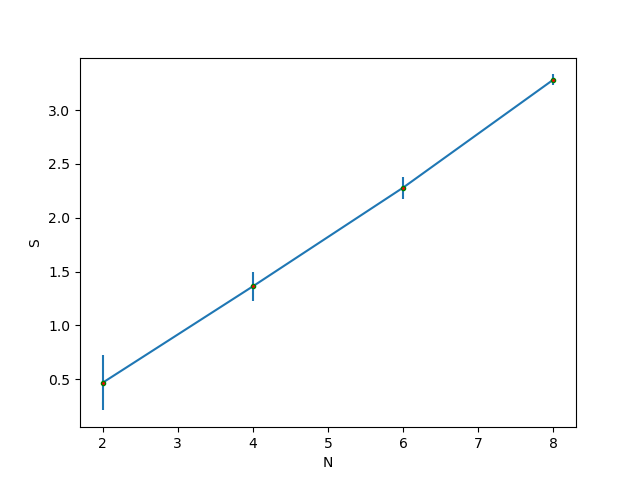

In [46]:
mean_ent=[]
std_ent=[]
for N in range(2,10,2):
    print(N)
    dim_h =2**N
    ent_entropies=[]
    #print(dim_h)
    for _ in range(0,100):
        init_state = np.zeros([dim_h,1])
        init_state[0]=1.
        random_h = np.array(np.random.rand(dim_h,dim_h)+1j*np.random.rand(dim_h,dim_h))
        random_h = random_h+random_h.T.conj()
        random_h = random_h/LA.norm(random_h)

        random_unitary =LA.expm(-N**4*1j*random_h)
        random_state=random_unitary@init_state
        #print(LA.norm(random_state))
        sqrt_reduced_density_matrix = np.reshape(random_state,[int(2**(N/2)),int(2**(N/2))])
        _, ent_spectrum,_= LA.svd(sqrt_reduced_density_matrix)
        #print(np.sum(ent_spectrum**2))
        ent_entropy = -np.dot(np.log(ent_spectrum**2),ent_spectrum**2)/np.log(2)
        ent_entropies.append(ent_entropy)
    
    mean_ent.append(np.mean(ent_entropies))  
    std_ent.append(np.std(ent_entropies))
    #plt.plot(ent_entropies)


plt.figure()

plt.errorbar( range(2,10,2), mean_ent,std_ent,marker='o', mfc='red',
         mec='green', ms=3, mew=1)
plt.xlabel('N')
plt.ylabel('S')
    #plt.ylabel('Entanglement bi-partition')
    #plt.xlabel('Realization')
    #plt.ylabel('Entanglement bi-partition')

plt.show()